<a href="https://colab.research.google.com/github/victorlim98/ESUN_AI_2025/blob/main/ESUN_AI_CLD_v1_local.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ============================================================================
# 玉山警示帳戶預測 - 階段一：深入數據探索與視覺化
# ============================================================================

# %% 1. 導入套件
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# 設置視覺化風格
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei', 'Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (15, 6)

print("=" * 80)
print("🎯 玉山警示帳戶預測 - 深度數據分析")
print("=" * 80)

🎯 玉山警示帳戶預測 - 深度數據分析


In [ ]:
# %% 2. 載入數據
print("\n📥 第一步：載入數據")
print("-" * 80)

# 修改為您的路徑
DATA_PATH = r'G:\中正大學\比賽\E-Sun\E-SUN初賽資料'

df_txn = pd.read_csv(f'{DATA_PATH}\\acct_transaction.csv')
df_alert = pd.read_csv(f'{DATA_PATH}\\acct_alert.csv')
df_test = pd.read_csv(f'{DATA_PATH}\\acct_predict.csv')

print(f"✅ 交易數據: {df_txn.shape}")
print(f"✅ 警示帳戶: {df_alert.shape}")
print(f"✅ 測試數據: {df_test.shape}")

# 查看數據基本信息
print("\n📊 交易數據前5筆:")
print(df_txn.head())
print("\n📊 數據類型:")
print(df_txn.dtypes)


📥 第一步：載入數據
--------------------------------------------------------------------------------
✅ 交易數據: (4435890, 10)
✅ 警示帳戶: (1004, 2)
✅ 測試數據: (4780, 2)

📊 交易數據前5筆:
                                           from_acct  from_acct_type  \
0  be6fdd2d0f9aa02b0b09436fb137654942e3346e16ab43...               1   
1  18f3d0e79217f8bc8b4cb485f9f80a884771b846de652f...               1   
2  302f3911cbf56bf9b5ad209a4b045a82380f98d92604c1...               1   
3  5a4809796865b1526f46e5dda6a35c1a4def3cbe969cc8...               1   
4  7f84214987bdee16ffbaf3d70824e6385ce80e032a24c5...               1   

                                             to_acct  to_acct_type  \
0  7abb16ac9bddc1f464981131ba68506775a964df2e0734...             1   
1  e77e425fb5f3ece7a7b431b3c43cc1d040f3054e35479d...             2   
2  4a707a0af2aa824777082803013610090033104c308023...             1   
3  d16b1bf33802f020b508002755c13aad549bc59dde7aae...             2   
4  c2e0f75b54f394b29755779ab9a488931e9d893a0e5f8f...  

In [ ]:
# %% 3. 數據前置處理
print("\n🔧 第二步：數據前置處理")
print("-" * 80)

# 3.1 時間格式轉換
print("⏰ 處理時間欄位...")

# 先查看原始格式和數據類型
print(f"   txn_date 原始類型: {df_txn['txn_date'].dtype}")
print(f"   txn_time 原始類型: {df_txn['txn_time'].dtype}")
print(f"   txn_date 原始前5筆: {df_txn['txn_date'].head().tolist()}")
print(f"   txn_time 原始前5筆: {df_txn['txn_time'].head().tolist()}")

# 重新讀取以確保是原始數據（之前可能被修改過）
print("\n🔄 重新讀取數據以確保原始格式...")
df_txn = pd.read_csv(f'{DATA_PATH}\\acct_transaction.csv')
df_alert = pd.read_csv(f'{DATA_PATH}\\acct_alert.csv')

print(f"   txn_date 類型: {df_txn['txn_date'].dtype}")
print(f"   txn_date 範圍: {df_txn['txn_date'].min()} - {df_txn['txn_date'].max()}")
print(f"   event_date 類型: {df_alert['event_date'].dtype}")
print(f"   event_date 範圍: {df_alert['event_date'].min()} - {df_alert['event_date'].max()}")

# 保存原始的天數（整數格式）
df_txn['txn_day'] = df_txn['txn_date'].astype(int)
df_alert['event_day'] = df_alert['event_date'].astype(int)

# 轉換為實際日期（假設 day 1 = 2025-07-01）
start_date = pd.Timestamp('2025-07-01')
df_txn['txn_date'] = start_date + pd.to_timedelta(df_txn['txn_day'], unit='D')
df_alert['event_date'] = start_date + pd.to_timedelta(df_alert['event_day'], unit='D')

print(f"   轉換後日期範圍: {df_txn['txn_date'].min()} 至 {df_txn['txn_date'].max()}")

# 處理 txn_time - 已經是 HH:MM:SS 格式
print("\n   解析時間...")
df_txn['txn_time_str'] = df_txn['txn_time'].astype(str)

# 分割時間字符串
time_parts = df_txn['txn_time_str'].str.split(':', expand=True)

# 提取小時、分鐘、秒
df_txn['hour'] = pd.to_numeric(time_parts[0], errors='coerce').fillna(0).astype(int)
df_txn['minute'] = pd.to_numeric(time_parts[1], errors='coerce').fillna(0).astype(int) if time_parts.shape[1] > 1 else 0
df_txn['second'] = pd.to_numeric(time_parts[2], errors='coerce').fillna(0).astype(int) if time_parts.shape[1] > 2 else 0

# 檢查範圍
print(f"   小時範圍: {df_txn['hour'].min()} - {df_txn['hour'].max()}")
print(f"   分鐘範圍: {df_txn['minute'].min()} - {df_txn['minute'].max()}")

# 建立完整的datetime
df_txn['txn_datetime'] = pd.to_datetime(
    df_txn['txn_date'].astype(str) + ' ' + df_txn['txn_time_str'],
    errors='coerce'
)

# 提取時間特徵
df_txn['day_of_week'] = df_txn['txn_date'].dt.dayofweek
df_txn['day_of_month'] = df_txn['txn_date'].dt.day
df_txn['is_weekend'] = df_txn['day_of_week'].isin([5, 6]).astype(int)

print(f"\n✅ 時間處理完成")
print(f"   交易日期範圍: 第 {df_txn['txn_day'].min()} 天 至 第 {df_txn['txn_day'].max()} 天")
print(f"   實際日期範圍: {df_txn['txn_date'].min()} 至 {df_txn['txn_date'].max()}")
print(f"   時間跨度: {df_txn['txn_day'].max() - df_txn['txn_day'].min()} 天")

print(f"✅ 時間處理完成")
print(f"   交易時間範圍: {df_txn['txn_date'].min()} 至 {df_txn['txn_date'].max()}")
print(f"   時間跨度: {(df_txn['txn_date'].max() - df_txn['txn_date'].min()).days} 天")

# 3.2 處理缺失值
print("\n🔍 檢查缺失值...")
missing_stats = pd.DataFrame({
    '缺失數量': df_txn.isnull().sum(),
    '缺失比例': df_txn.isnull().sum() / len(df_txn) * 100
})
missing_stats = missing_stats[missing_stats['缺失數量'] > 0]
if len(missing_stats) > 0:
    print(missing_stats)
else:
    print("✅ 無缺失值")

# 3.3 數據類型檢查
print("\n📝 數據類型統計:")
print(f"   數值型欄位: {df_txn.select_dtypes(include=[np.number]).columns.tolist()}")
print(f"   類別型欄位: {df_txn.select_dtypes(include=['object']).columns.tolist()}")


🔧 第二步：數據前置處理
--------------------------------------------------------------------------------
⏰ 處理時間欄位...
   txn_date 原始類型: int64
   txn_time 原始類型: object
   txn_date 原始前5筆: [71, 31, 37, 106, 84]
   txn_time 原始前5筆: ['05:05:00', '20:55:00', '09:20:00', '13:40:00', '11:20:00']

🔄 重新讀取數據以確保原始格式...
   txn_date 類型: int64
   txn_date 範圍: 1 - 121
   event_date 類型: int64
   event_date 範圍: 1 - 121
   轉換後日期範圍: 2025-07-02 00:00:00 至 2025-10-30 00:00:00

   解析時間...
   小時範圍: 0 - 23
   分鐘範圍: 0 - 55

✅ 時間處理完成
   交易日期範圍: 第 1 天 至 第 121 天
   實際日期範圍: 2025-07-02 00:00:00 至 2025-10-30 00:00:00
   時間跨度: 120 天
✅ 時間處理完成
   交易時間範圍: 2025-07-02 00:00:00 至 2025-10-30 00:00:00
   時間跨度: 120 天

🔍 檢查缺失值...
✅ 無缺失值

📝 數據類型統計:
   數值型欄位: ['from_acct_type', 'to_acct_type', 'txn_amt', 'txn_day', 'hour', 'minute', 'second', 'day_of_week', 'day_of_month', 'is_weekend']
   類別型欄位: ['from_acct', 'to_acct', 'is_self_txn', 'txn_time', 'currency_type', 'channel_type', 'txn_time_str']


In [ ]:
# %% 4. 核心數據探索 - 警示帳戶 vs 正常帳戶
print("\n" + "=" * 80)
print("📊 第三步：警示帳戶 vs 正常帳戶對比分析")
print("=" * 80)

# 4.1 建立標籤
print("\n🏷️ 建立帳戶標籤...")

# 獲取所有玉山帳戶
# 修正：將 '01' 改為 1，因為 from_acct_type 和 to_acct_type 是整數類型
all_yushan_from = df_txn[df_txn['from_acct_type'] == 1]['from_acct'].unique()
all_yushan_to = df_txn[df_txn['to_acct_type'] == 1]['to_acct'].unique()
all_yushan_accounts = np.unique(np.concatenate([all_yushan_from, all_yushan_to]))

print(f"✅ 玉山帳戶總數: {len(all_yushan_accounts):,}")
print(f"✅ 警示帳戶數: {len(df_alert):,} ({len(df_alert)/len(all_yushan_accounts)*100:.3f}%")

# 建立標籤DataFrame
account_labels = pd.DataFrame({'acct': all_yushan_accounts})
account_labels['is_alert'] = account_labels['acct'].isin(df_alert['acct'].values).astype(int)

print(f"\n類別分布:")
print(account_labels['is_alert'].value_counts())


📊 第三步：警示帳戶 vs 正常帳戶對比分析

🏷️ 建立帳戶標籤...
✅ 玉山帳戶總數: 333,768
✅ 警示帳戶數: 1,004 (0.301%

類別分布:
is_alert
0    332764
1      1004
Name: count, dtype: int64



📈 視覺化 Part 1: 交易時間模式


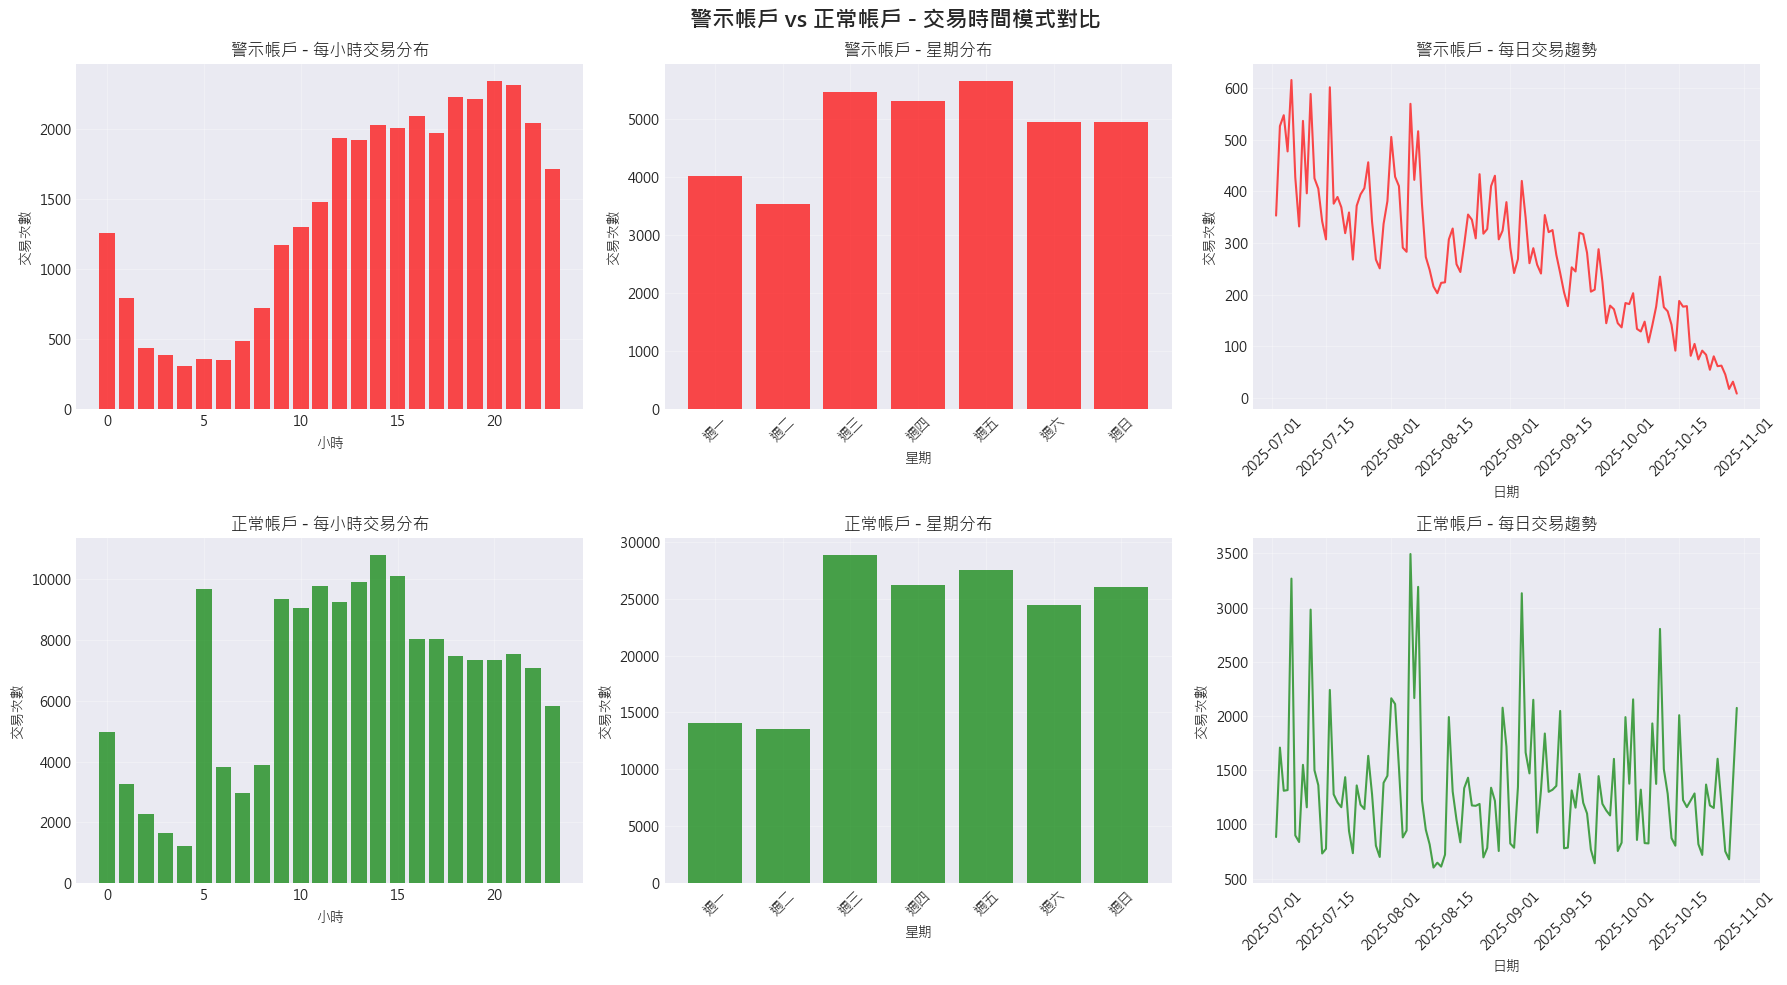

✅ 時間模式視覺化完成


In [ ]:
# %% 5. 視覺化 Part 1 - 交易時間分析
print("\n" + "=" * 80)
print("📈 視覺化 Part 1: 交易時間模式")
print("=" * 80)

# 5.1 警示帳戶的交易
alert_txns = df_txn[
    df_txn['from_acct'].isin(df_alert['acct']) |
    df_txn['to_acct'].isin(df_alert['acct'])
].copy()
alert_txns['account_type'] = '警示帳戶'

# 5.2 隨機抽樣正常帳戶（與警示帳戶相同數量）
normal_accounts = account_labels[account_labels['is_alert'] == 0]['acct'].sample(
    n=min(len(df_alert) * 10, len(account_labels[account_labels['is_alert'] == 0])),
    random_state=42
)
normal_txns = df_txn[
    df_txn['from_acct'].isin(normal_accounts) |
    df_txn['to_acct'].isin(normal_accounts)
].copy()
normal_txns['account_type'] = '正常帳戶'

# 合併用於對比
compare_txns = pd.concat([alert_txns, normal_txns])

# 5.3 視覺化：交易時段分布
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('警示帳戶 vs 正常帳戶 - 交易時間模式對比', fontsize=16, fontweight='bold')

# 5.3.1 每小時交易分布
for idx, acc_type in enumerate(['警示帳戶', '正常帳戶']):
    data = compare_txns[compare_txns['account_type'] == acc_type]['hour'].value_counts().sort_index()
    axes[idx, 0].bar(data.index, data.values, color='red' if acc_type == '警示帳戶' else 'green', alpha=0.7)
    axes[idx, 0].set_title(f'{acc_type} - 每小時交易分布')
    axes[idx, 0].set_xlabel('小時')
    axes[idx, 0].set_ylabel('交易次數')
    axes[idx, 0].grid(True, alpha=0.3)

# 5.3.2 星期分布
for idx, acc_type in enumerate(['警示帳戶', '正常帳戶']):
    data = compare_txns[compare_txns['account_type'] == acc_type]['day_of_week'].value_counts().sort_index()
    days = ['週一', '週二', '週三', '週四', '週五', '週六', '週日']
    axes[idx, 1].bar(range(7), [data.get(i, 0) for i in range(7)],
                     color='red' if acc_type == '警示帳戶' else 'green', alpha=0.7)
    axes[idx, 1].set_title(f'{acc_type} - 星期分布')
    axes[idx, 1].set_xlabel('星期')
    axes[idx, 1].set_ylabel('交易次數')
    axes[idx, 1].set_xticks(range(7))
    axes[idx, 1].set_xticklabels(days, rotation=45)
    axes[idx, 1].grid(True, alpha=0.3)

# 5.3.3 每日交易趨勢
for idx, acc_type in enumerate(['警示帳戶', '正常帳戶']):
    data = compare_txns[compare_txns['account_type'] == acc_type].groupby('txn_date').size()
    axes[idx, 2].plot(data.index, data.values,
                      color='red' if acc_type == '警示帳戶' else 'green', alpha=0.7)
    axes[idx, 2].set_title(f'{acc_type} - 每日交易趨勢')
    axes[idx, 2].set_xlabel('日期')
    axes[idx, 2].set_ylabel('交易次數')
    axes[idx, 2].tick_params(axis='x', rotation=45)
    axes[idx, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ 時間模式視覺化完成")


📈 視覺化 Part 2: 交易金額模式


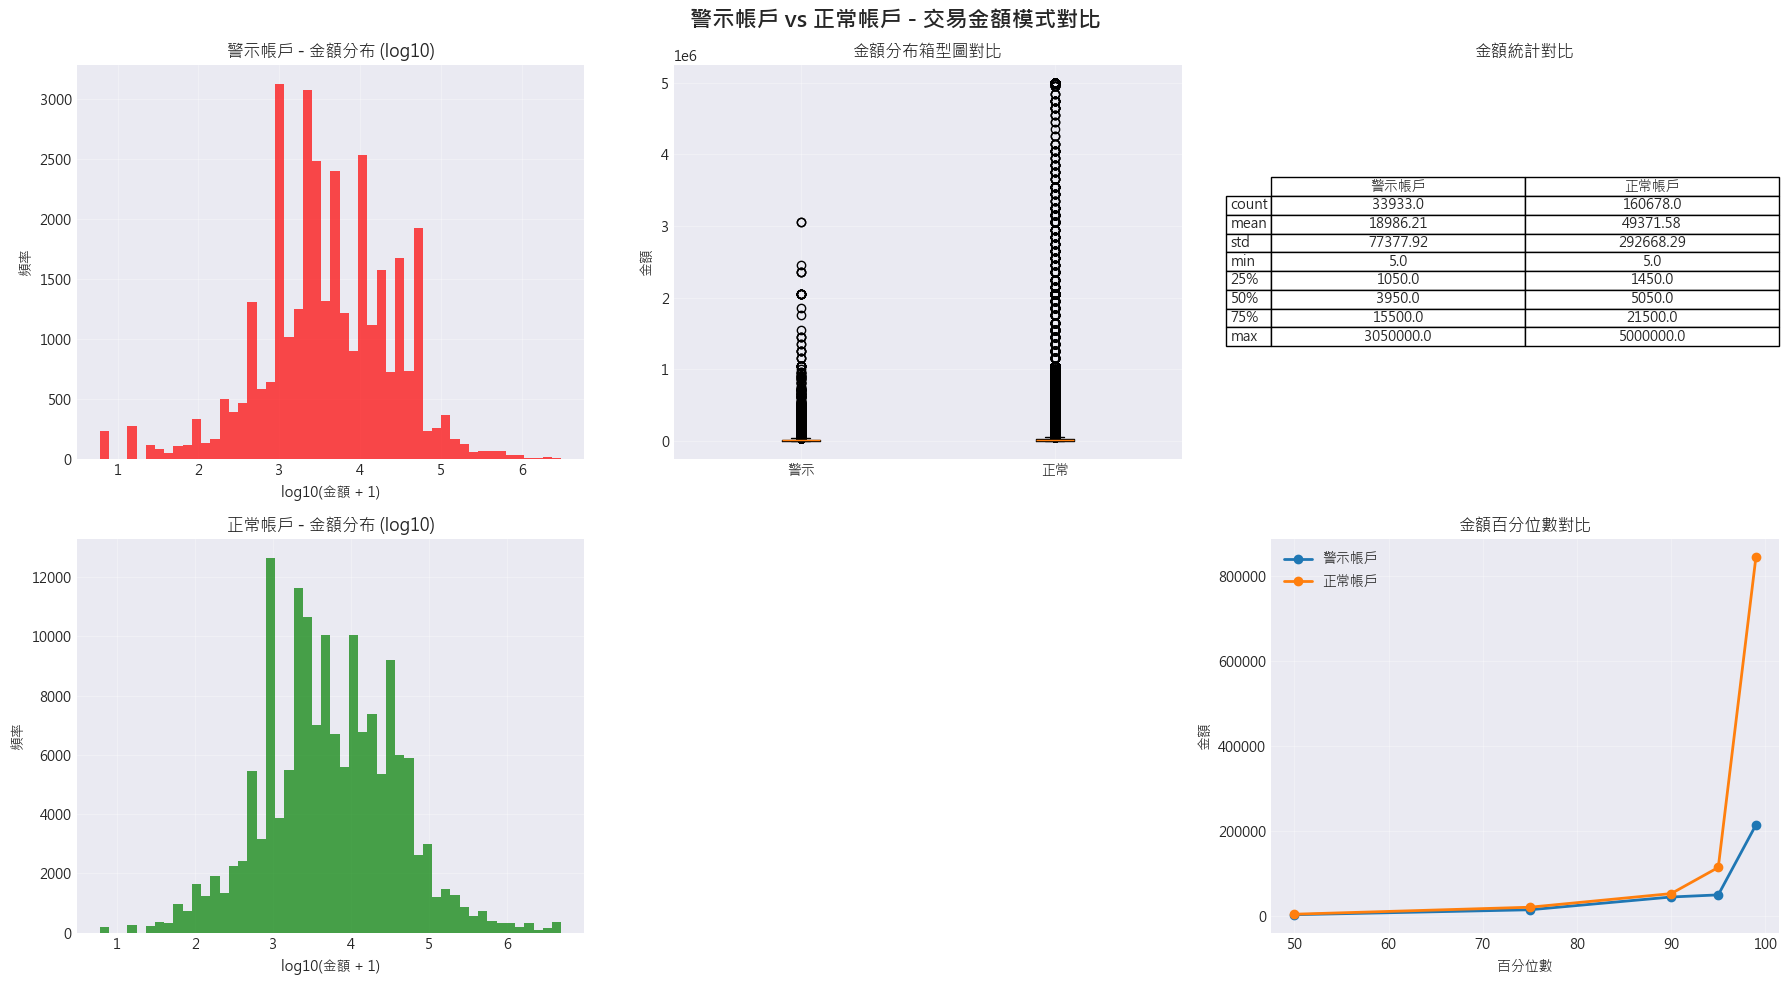

✅ 金額模式視覺化完成


In [ ]:
# %% 6. 視覺化 Part 2 - 交易金額分析
print("\n" + "=" * 80)
print("📈 視覺化 Part 2: 交易金額模式")
print("=" * 80)

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('警示帳戶 vs 正常帳戶 - 交易金額模式對比', fontsize=16, fontweight='bold')

# 6.1 金額分布（對數尺度）
for idx, acc_type in enumerate(['警示帳戶', '正常帳戶']):
    data = compare_txns[compare_txns['account_type'] == acc_type]['txn_amt']
    axes[idx, 0].hist(np.log10(data + 1), bins=50,
                      color='red' if acc_type == '警示帳戶' else 'green', alpha=0.7)
    axes[idx, 0].set_title(f'{acc_type} - 金額分布 (log10)')
    axes[idx, 0].set_xlabel('log10(金額 + 1)')
    axes[idx, 0].set_ylabel('頻率')
    axes[idx, 0].grid(True, alpha=0.3)

# 6.2 金額箱型圖對比
alert_amounts = compare_txns[compare_txns['account_type'] == '警示帳戶']['txn_amt']
normal_amounts = compare_txns[compare_txns['account_type'] == '正常帳戶']['txn_amt']
axes[0, 1].boxplot([alert_amounts, normal_amounts], labels=['警示', '正常'])
axes[0, 1].set_title('金額分布箱型圖對比')
axes[0, 1].set_ylabel('金額')
axes[0, 1].grid(True, alpha=0.3)
axes[1, 1].axis('off')

# 6.3 金額統計對比
amount_stats = pd.DataFrame({
    '警示帳戶': alert_amounts.describe(),
    '正常帳戶': normal_amounts.describe()
})
axes[0, 2].axis('off')
axes[0, 2].table(cellText=amount_stats.round(2).values,
                 rowLabels=amount_stats.index,
                 colLabels=amount_stats.columns,
                 cellLoc='center',
                 loc='center')
axes[0, 2].set_title('金額統計對比')

# 6.4 大額交易比例
for idx, acc_type in enumerate(['警示帳戶', '正常帳戶']):
    data = compare_txns[compare_txns['account_type'] == acc_type]['txn_amt']
    percentiles = [50, 75, 90, 95, 99]
    values = [np.percentile(data, p) for p in percentiles]
    axes[1, 2].plot(percentiles, values, marker='o',
                    label=acc_type, linewidth=2)

axes[1, 2].set_title('金額百分位數對比')
axes[1, 2].set_xlabel('百分位數')
axes[1, 2].set_ylabel('金額')
axes[1, 2].legend()
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ 金額模式視覺化完成")


📈 視覺化 Part 3: 交易行為模式


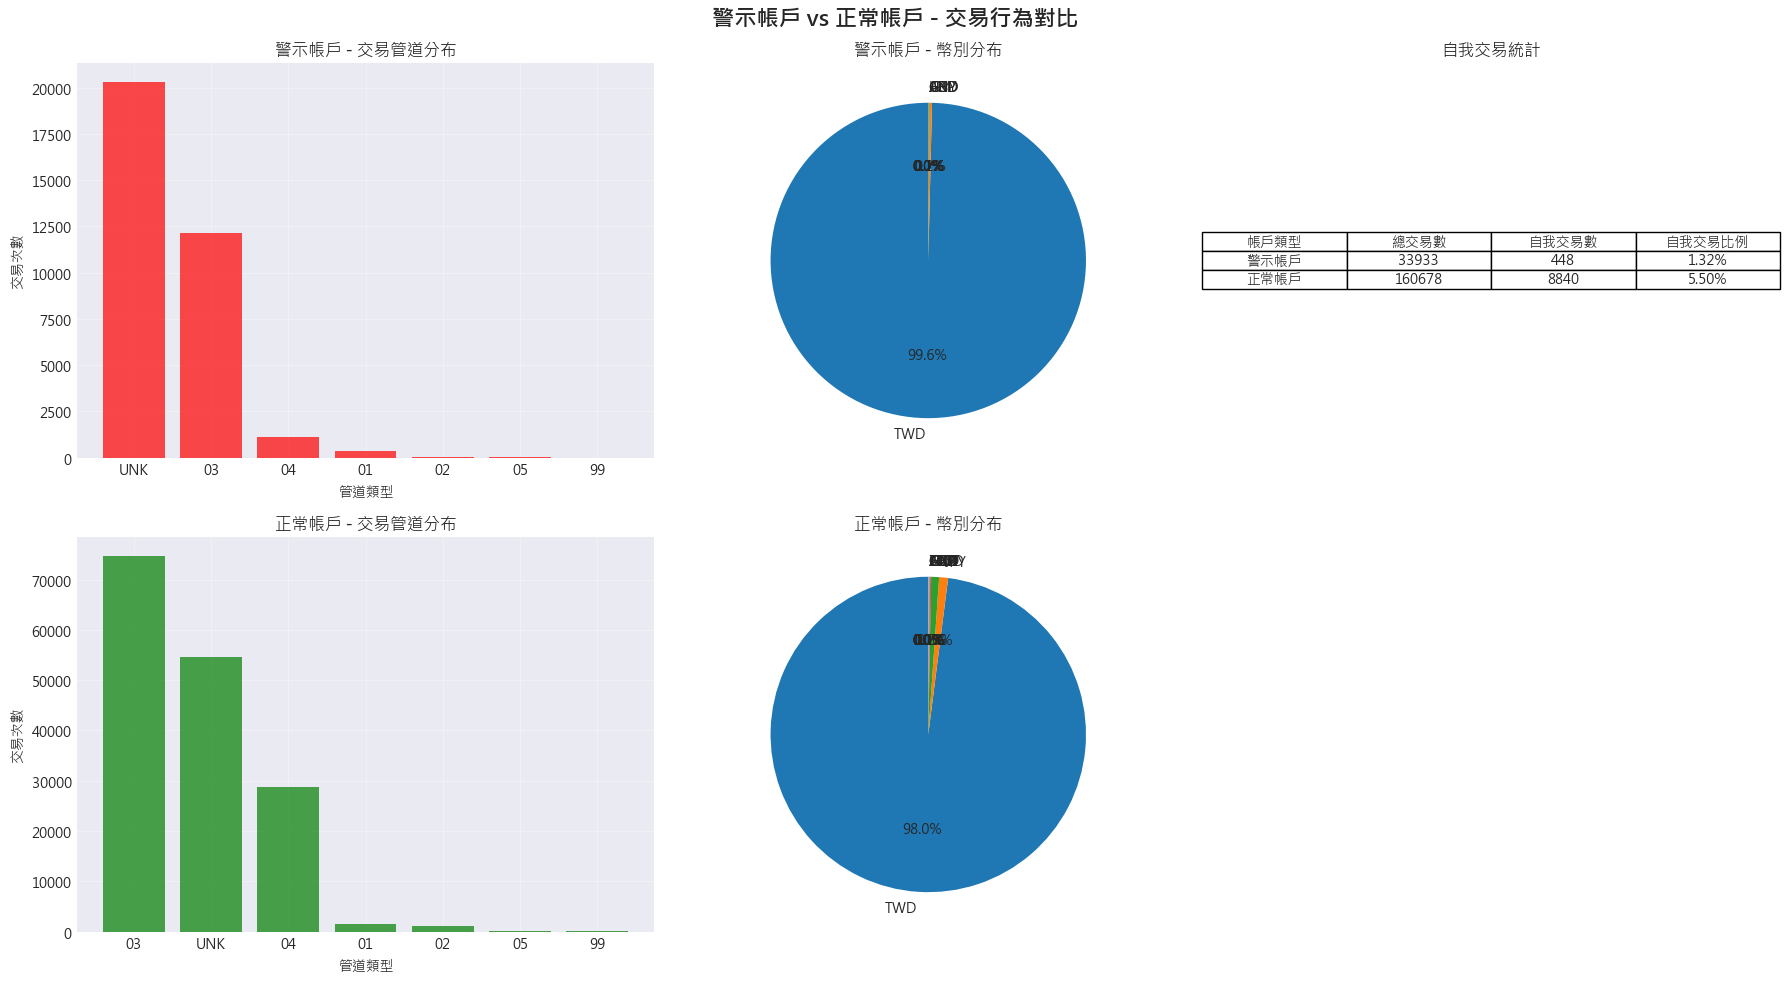

✅ 交易行為視覺化完成


In [ ]:
# %% 7. 視覺化 Part 3 - 交易行為分析
print("\n" + "=" * 80)
print("📈 視覺化 Part 3: 交易行為模式")
print("=" * 80)

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('警示帳戶 vs 正常帳戶 - 交易行為對比', fontsize=16, fontweight='bold')

# 7.1 交易管道分布
for idx, acc_type in enumerate(['警示帳戶', '正常帳戶']):
    data = compare_txns[compare_txns['account_type'] == acc_type]['channel_type'].value_counts()
    axes[idx, 0].bar(data.index.astype(str), data.values,
                     color='red' if acc_type == '警示帳戶' else 'green', alpha=0.7)
    axes[idx, 0].set_title(f'{acc_type} - 交易管道分布')
    axes[idx, 0].set_xlabel('管道類型')
    axes[idx, 0].set_ylabel('交易次數')
    axes[idx, 0].grid(True, alpha=0.3)

# 7.2 幣別分布
for idx, acc_type in enumerate(['警示帳戶', '正常帳戶']):
    data = compare_txns[compare_txns['account_type'] == acc_type]['currency_type'].value_counts()
    axes[idx, 1].pie(data.values, labels=data.index, autopct='%1.1f%%', startangle=90)
    axes[idx, 1].set_title(f'{acc_type} - 幣別分布')

# 7.3 自我交易比例
self_txn_stats = []
for acc_type in ['警示帳戶', '正常帳戶']:
    data = compare_txns[compare_txns['account_type'] == acc_type]
    total = len(data)
    self_txn = (data['is_self_txn'] == 'Y').sum()
    self_txn_stats.append({
        '帳戶類型': acc_type,
        '總交易數': total,
        '自我交易數': self_txn,
        '自我交易比例': f"{self_txn/total*100:.2f}%"
    })

self_txn_df = pd.DataFrame(self_txn_stats)
axes[0, 2].axis('off')
axes[0, 2].table(cellText=self_txn_df.values,
                 colLabels=self_txn_df.columns,
                 cellLoc='center',
                 loc='center')
axes[0, 2].set_title('自我交易統計')
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

print("✅ 交易行為視覺化完成")


📈 視覺化 Part 4: 帳戶層級統計
計算帳戶層級特徵...
   計算警示帳戶統計...
   計算正常帳戶統計（抽樣）...
✅ 統計完成: 警示 1004, 正常 5000


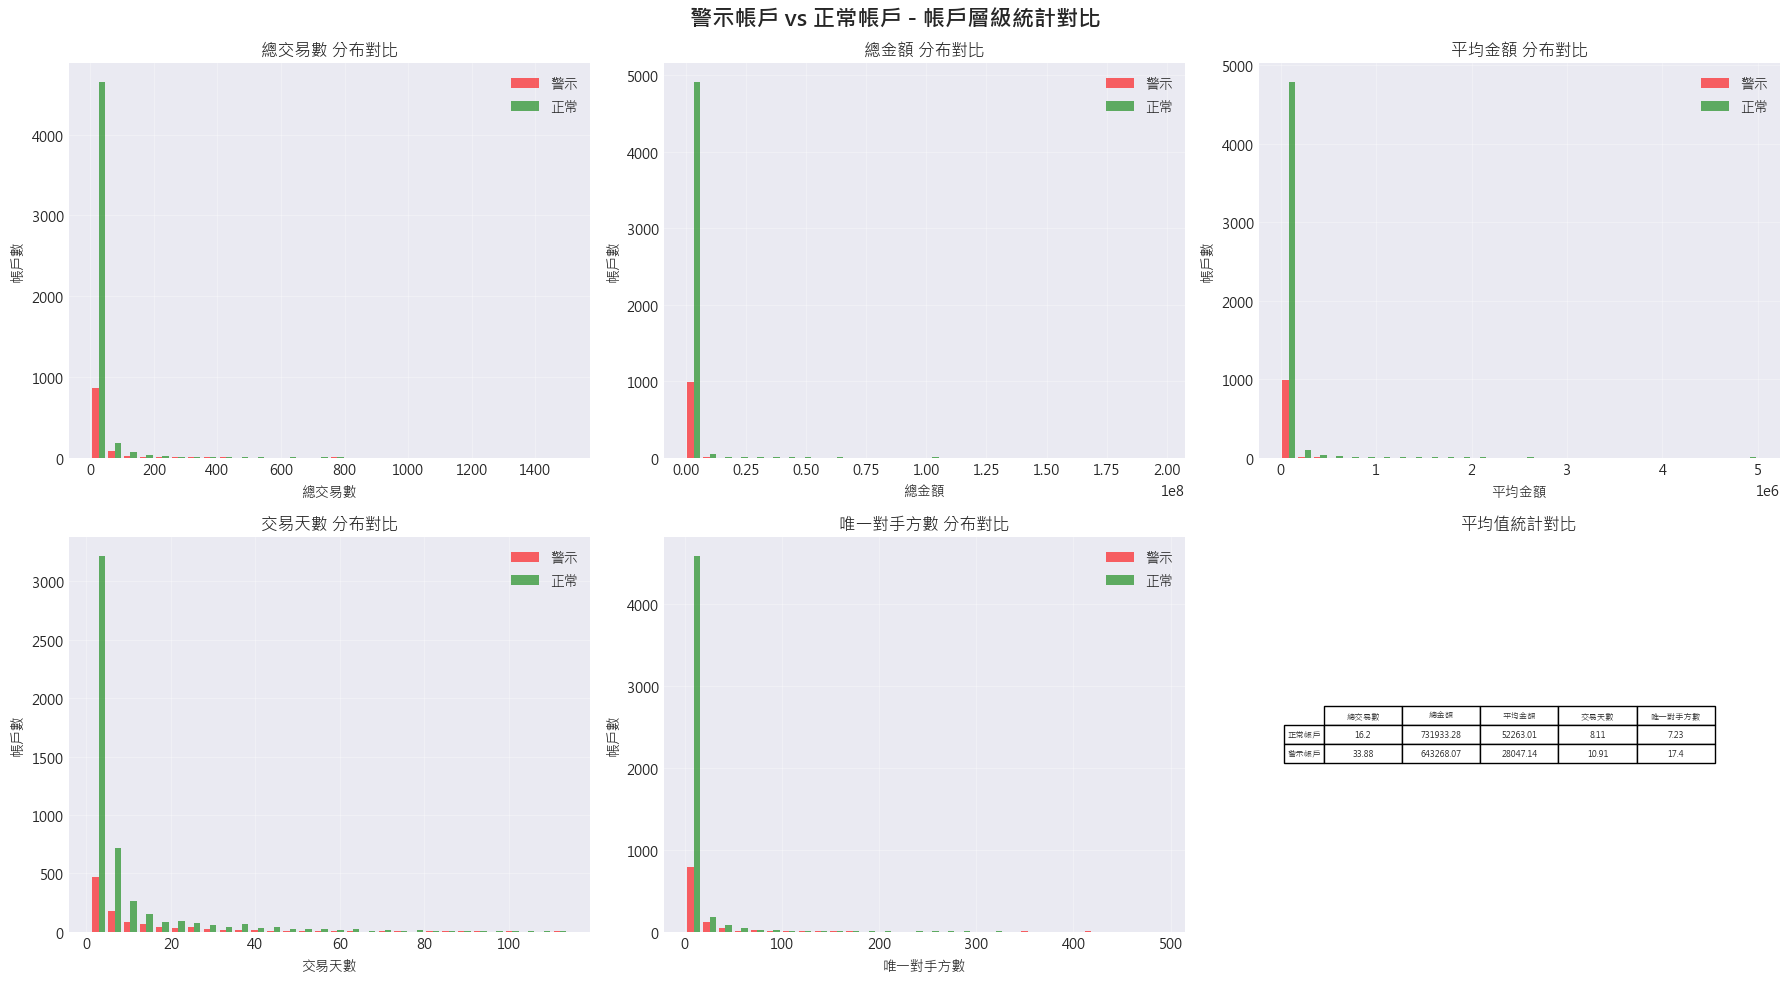

✅ 帳戶統計視覺化完成


In [ ]:
# %% 8. 視覺化 Part 4 - 帳戶層級統計
print("\n" + "=" * 80)
print("📈 視覺化 Part 4: 帳戶層級統計")
print("=" * 80)

print("計算帳戶層級特徵...")

# 計算每個帳戶的統計資訊
def calculate_account_stats(accounts, label):
    """計算帳戶統計資訊"""
    stats_list = []

    for acct in accounts:
        # 作為匯款方
        from_txns = df_txn[df_txn['from_acct'] == acct]
        # 作為收款方
        to_txns = df_txn[df_txn['to_acct'] == acct]
        # 所有交易
        all_txns = pd.concat([from_txns, to_txns])

        if len(all_txns) > 0:
            stats = {
                'acct': acct,
                'label': label,
                '總交易數': len(all_txns),
                '匯出交易數': len(from_txns),
                '匯入交易數': len(to_txns),
                '總金額': all_txns['txn_amt'].sum(),
                '平均金額': all_txns['txn_amt'].mean(),
                '金額標準差': all_txns['txn_amt'].std(),
                '交易天數': all_txns['txn_date'].nunique(),
                '唯一對手方數': pd.concat([from_txns['to_acct'], to_txns['from_acct']]).nunique()
            }
            stats_list.append(stats)

    return pd.DataFrame(stats_list)

# 計算警示帳戶統計
print("   計算警示帳戶統計...")
alert_stats = calculate_account_stats(df_alert['acct'].values, '警示帳戶')

# 計算正常帳戶統計（抽樣）
print("   計算正常帳戶統計（抽樣）...")
normal_sample = account_labels[account_labels['is_alert'] == 0]['acct'].sample(
    n=min(5000, len(account_labels[account_labels['is_alert'] == 0])),
    random_state=42
)
normal_stats = calculate_account_stats(normal_sample.values, '正常帳戶')

# 合併統計
all_stats = pd.concat([alert_stats, normal_stats], ignore_index=True)

print(f"✅ 統計完成: 警示 {len(alert_stats)}, 正常 {len(normal_stats)}")

# 視覺化帳戶統計
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('警示帳戶 vs 正常帳戶 - 帳戶層級統計對比', fontsize=16, fontweight='bold')

features_to_plot = ['總交易數', '總金額', '平均金額', '交易天數', '唯一對手方數']

for idx, feature in enumerate(features_to_plot):
    row = idx // 3
    col = idx % 3

    alert_data = all_stats[all_stats['label'] == '警示帳戶'][feature]
    normal_data = all_stats[all_stats['label'] == '正常帳戶'][feature]

    axes[row, col].hist([alert_data, normal_data], bins=30, label=['警示', '正常'],
                        color=['red', 'green'], alpha=0.6)
    axes[row, col].set_title(f'{feature} 分布對比')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('帳戶數')
    axes[row, col].legend()
    axes[row, col].grid(True, alpha=0.3)

# 統計摘要表
axes[1, 2].axis('off')
summary_stats = all_stats.groupby('label')[features_to_plot].mean().round(2)
axes[1, 2].table(cellText=summary_stats.values,
                 rowLabels=summary_stats.index,
                 colLabels=summary_stats.columns,
                 cellLoc='center',
                 loc='center',
                 colWidths=[0.15]*len(summary_stats.columns))
axes[1, 2].set_title('平均值統計對比')

plt.tight_layout()
plt.show()

print("✅ 帳戶統計視覺化完成")

In [ ]:
# %% 9. 關鍵發現總結
print("\n" + "=" * 80)
print("🔍 關鍵發現總結")
print("=" * 80)

print("\n📊 數據基本信息:")
print(f"   交易記錄總數: {len(df_txn):,}")
print(f"   時間範圍: {df_txn['txn_date'].min()} 至 {df_txn['txn_date'].max()}")
print(f"   玉山帳戶數: {len(all_yushan_accounts):,}")
print(f"   警示帳戶數: {len(df_alert):,} ({len(df_alert)/len(all_yushan_accounts)*100:.3f}%)")
print(f"   待測試帳戶數: {len(df_test):,}")

print("\n💡 警示帳戶 vs 正常帳戶差異:")
alert_avg = alert_stats[['總交易數', '總金額', '平均金額', '交易天數']].mean()
normal_avg = normal_stats[['總交易數', '總金額', '平均金額', '交易天數']].mean()

comparison = pd.DataFrame({
    '警示帳戶': alert_avg,
    '正常帳戶': normal_avg,
    '差異倍數': alert_avg / normal_avg
}).round(2)

print(comparison)

print("\n🎯 下一步建議:")
print("   1. 根據視覺化結果，確認哪些特徵有明顯區分性")
print("   2. 重點關注：交易時段、金額模式、交易頻率變化")
print("   3. 考慮時序特徵：近期行為變化、突發性交易")
print("   4. 網絡特徵：與其他警示帳戶的關聯")

print("\n📁 請查看生成的圖表，並告訴我您的發現！")
print("=" * 80)


🔍 關鍵發現總結

📊 數據基本信息:
   交易記錄總數: 4,435,890
   時間範圍: 2025-07-02 00:00:00 至 2025-10-30 00:00:00
   玉山帳戶數: 333,768
   警示帳戶數: 1,004 (0.301%)
   待測試帳戶數: 4,780

💡 警示帳戶 vs 正常帳戶差異:
           警示帳戶       正常帳戶  差異倍數
總交易數      33.88      16.20  2.09
總金額   643268.07  731933.28  0.88
平均金額   28047.14   52263.01  0.54
交易天數      10.91       8.11  1.35

🎯 下一步建議:
   1. 根據視覺化結果，確認哪些特徵有明顯區分性
   2. 重點關注：交易時段、金額模式、交易頻率變化
   3. 考慮時序特徵：近期行為變化、突發性交易
   4. 網絡特徵：與其他警示帳戶的關聯

📁 請查看生成的圖表，並告訴我您的發現！


# 資料處理
---


In [13]:
# %% 1. 導入套件和載入數據
import pandas as pd
import numpy as np
from datetime import timedelta
import warnings
warnings.filterwarnings('ignore')

# 機器學習
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, classification_report, roc_auc_score
import lightgbm as lgb
import xgboost as xgb

# 視覺化
import matplotlib.pyplot as plt
import seaborn as sns

print("=" * 80)
print("🎯 玉山警示帳戶預測 - 改進版特徵工程")
print("=" * 80)

# 設置路徑
DATA_PATH = r'G:\中正大學\比賽\E-Sun\E-SUN初賽資料'

# 載入數據
df_txn = pd.read_csv(f'{DATA_PATH}\\acct_transaction.csv')
df_alert = pd.read_csv(f'{DATA_PATH}\\acct_alert.csv')
df_test = pd.read_csv(f'{DATA_PATH}\\acct_predict.csv')

print(f"✅ 數據載入完成")
print(f"   交易記錄: {len(df_txn):,}")
print(f"   警示帳戶: {len(df_alert):,}")
print(f"   測試帳戶: {len(df_test):,}")

🎯 玉山警示帳戶預測 - 改進版特徵工程
✅ 數據載入完成
   交易記錄: 4,435,890
   警示帳戶: 1,004
   測試帳戶: 4,780


In [14]:
# %% 2. 數據預處理
print("\n" + "=" * 80)
print("第一步：數據預處理")
print("=" * 80)

# 時間處理
df_txn['txn_day'] = df_txn['txn_date'].astype(int)
df_alert['event_day'] = df_alert['event_date'].astype(int)

# 時間特徵
df_txn['txn_time_str'] = df_txn['txn_time'].astype(str)
time_parts = df_txn['txn_time_str'].str.split(':', expand=True)
df_txn['hour'] = pd.to_numeric(time_parts[0], errors='coerce').fillna(0).astype(int)
df_txn['minute'] = pd.to_numeric(time_parts[1], errors='coerce').fillna(0).astype(int)

# 時段分類
df_txn['time_period'] = pd.cut(df_txn['hour'],
                               bins=[0, 6, 12, 18, 24],
                               labels=['深夜', '上午', '下午', '晚上'],
                               include_lowest=True)

print(f"✅ 預處理完成")


第一步：數據預處理
✅ 預處理完成


In [15]:
# %% 3. 改進版特徵工程函數
print("\n" + "=" * 80)
print("第二步：改進版特徵工程")
print("=" * 80)

def extract_advanced_features(transactions, account_list):
    """
    根據視覺化分析結果，提取最有區分性的特徵
    """
    print(f"處理 {len(account_list)} 個帳戶...")

    features_list = []

    for idx, acct in enumerate(account_list):
        if idx % 500 == 0:
            print(f"  進度: {idx}/{len(account_list)}")

        # 獲取該帳戶的所有交易
        from_txns = transactions[transactions['from_acct'] == acct]
        to_txns = transactions[transactions['to_acct'] == acct]
        all_txns = pd.concat([from_txns, to_txns])

        features = {'acct': acct}

        # ============================================================
        # 特徵組 1: 基礎統計（根據視覺化發現，交易數量是關鍵）
        # ============================================================
        features['total_txn_count'] = len(all_txns)
        features['from_txn_count'] = len(from_txns)
        features['to_txn_count'] = len(to_txns)

        # 匯入匯出比例（警示帳戶可能更多收款）
        features['from_to_ratio'] = len(from_txns) / (len(to_txns) + 1)
        features['to_from_ratio'] = len(to_txns) / (len(from_txns) + 1)

        # ============================================================
        # 特徵組 2: 金額特徵（細緻化）
        # ============================================================
        if len(all_txns) > 0:
            amounts = all_txns['txn_amt']

            # 基礎統計
            features['total_amount'] = amounts.sum()
            features['mean_amount'] = amounts.mean()
            features['median_amount'] = amounts.median()
            features['std_amount'] = amounts.std()
            features['max_amount'] = amounts.max()
            features['min_amount'] = amounts.min()

            # 金額變異係數（高變異可能表示異常）
            features['cv_amount'] = features['std_amount'] / (features['mean_amount'] + 1)

            # 整數金額比例（詐騙常用整數）
            features['round_amount_ratio'] = (amounts % 1000 == 0).mean()
            features['exact_amount_ratio'] = (amounts % 100 == 0).mean()

            # 金額重複性（多筆相同金額可疑）
            features['amount_diversity'] = amounts.nunique() / len(amounts)

            # 分位數特徵
            features['amount_q25'] = amounts.quantile(0.25)
            features['amount_q75'] = amounts.quantile(0.75)
            features['amount_iqr'] = features['amount_q75'] - features['amount_q25']

            # 大額交易特徵
            large_threshold = amounts.quantile(0.9)
            features['large_txn_count'] = (amounts > large_threshold).sum()
            features['large_txn_ratio'] = features['large_txn_count'] / len(amounts)

        else:
            for col in ['total_amount', 'mean_amount', 'median_amount', 'std_amount',
                       'max_amount', 'min_amount', 'cv_amount', 'round_amount_ratio',
                       'exact_amount_ratio', 'amount_diversity', 'amount_q25', 'amount_q75',
                       'amount_iqr', 'large_txn_count', 'large_txn_ratio']:
                features[col] = 0

        # ============================================================
        # 特徵組 3: 時間特徵（時序演化是關鍵）
        # ============================================================
        if len(all_txns) > 0:
            days = all_txns['txn_day']

            # 時間跨度
            features['day_span'] = days.max() - days.min() + 1
            features['active_days'] = days.nunique()
            features['activity_ratio'] = features['active_days'] / features['day_span']

            # 交易頻率
            features['txn_per_day'] = features['total_txn_count'] / features['day_span']

            # 最近活躍度（最後10天）
            max_day = days.max()
            recent_10d = all_txns[days > max_day - 10]
            features['recent_10d_txn_count'] = len(recent_10d)
            features['recent_10d_txn_ratio'] = len(recent_10d) / (features['total_txn_count'] + 1)

            # 最近30天
            recent_30d = all_txns[days > max_day - 30]
            features['recent_30d_txn_count'] = len(recent_30d)
            features['recent_30d_txn_ratio'] = len(recent_30d) / (features['total_txn_count'] + 1)

            # 突發性交易（最近vs整體）
            features['burst_score'] = features['recent_10d_txn_ratio'] / (features['activity_ratio'] + 0.01)

            # 時段分布
            if 'hour' in all_txns.columns:
                features['night_txn_ratio'] = ((all_txns['hour'] >= 22) | (all_txns['hour'] <= 6)).mean()
                features['hour_std'] = all_txns['hour'].std()
        else:
            for col in ['day_span', 'active_days', 'activity_ratio', 'txn_per_day',
                       'recent_10d_txn_count', 'recent_10d_txn_ratio',
                       'recent_30d_txn_count', 'recent_30d_txn_ratio',
                       'burst_score', 'night_txn_ratio', 'hour_std']:
                features[col] = 0

        # ============================================================
        # 特徵組 4: 網絡特徵（對手方分析）
        # ============================================================
        # 唯一對手方數量
        unique_from_accounts = to_txns['from_acct'].nunique() if len(to_txns) > 0 else 0
        unique_to_accounts = from_txns['to_acct'].nunique() if len(from_txns) > 0 else 0

        features['unique_counterparty'] = unique_from_accounts + unique_to_accounts
        features['unique_from_accounts'] = unique_from_accounts
        features['unique_to_accounts'] = unique_to_accounts

        # 平均每個對手方的交易次數（低可能表示廣撒網）
        features['avg_txn_per_counterparty'] = features['total_txn_count'] / (features['unique_counterparty'] + 1)

        # 對手方集中度（是否只和少數帳戶交易）
        if len(to_txns) > 0:
            from_account_freq = to_txns['from_acct'].value_counts()
            features['top1_from_ratio'] = from_account_freq.iloc[0] / len(to_txns) if len(from_account_freq) > 0 else 0
            features['top3_from_ratio'] = from_account_freq.head(3).sum() / len(to_txns) if len(from_account_freq) > 0 else 0
        else:
            features['top1_from_ratio'] = 0
            features['top3_from_ratio'] = 0

        if len(from_txns) > 0:
            to_account_freq = from_txns['to_acct'].value_counts()
            features['top1_to_ratio'] = to_account_freq.iloc[0] / len(from_txns) if len(to_account_freq) > 0 else 0
            features['top3_to_ratio'] = to_account_freq.head(3).sum() / len(from_txns) if len(to_account_freq) > 0 else 0
        else:
            features['top1_to_ratio'] = 0
            features['top3_to_ratio'] = 0

        # ============================================================
        # 特徵組 5: 行為特徵
        # ============================================================
        # 自我交易
        features['self_txn_count'] = (all_txns['is_self_txn'] == 'Y').sum()
        features['self_txn_ratio'] = features['self_txn_count'] / (features['total_txn_count'] + 1)

        # 管道多樣性（根據視覺化，這可能是區分特徵）
        features['channel_diversity'] = all_txns['channel_type'].nunique() if len(all_txns) > 0 else 0

        # 各管道使用比例
        if len(all_txns) > 0:
            channel_counts = all_txns['channel_type'].value_counts(normalize=True)
            for ch in range(1, 8):
                features[f'channel_{ch}_ratio'] = channel_counts.get(ch, 0)
        else:
            for ch in range(1, 8):
                features[f'channel_{ch}_ratio'] = 0

        # 幣別多樣性
        features['currency_diversity'] = all_txns['currency_type'].nunique() if len(all_txns) > 0 else 0
        features['twd_ratio'] = (all_txns['currency_type'] == 'TWD').mean() if len(all_txns) > 0 else 0

        # 帳戶類型（玉山 vs 其他）
        features['yushan_from_ratio'] = (from_txns['from_acct_type'] == '01').mean() if len(from_txns) > 0 else 0
        features['yushan_to_ratio'] = (to_txns['to_acct_type'] == '01').mean() if len(to_txns) > 0 else 0

        # ============================================================
        # 特徵組 6: 複合風險評分
        # ============================================================
        # 綜合風險評分（基於多個異常指標）
        risk_factors = [
            features['burst_score'] > 2,  # 突發性交易
            features['round_amount_ratio'] > 0.5,  # 大量整數金額
            features['night_txn_ratio'] > 0.3,  # 頻繁深夜交易
            features['avg_txn_per_counterparty'] < 2,  # 對手方分散
            features['recent_10d_txn_ratio'] > 0.5,  # 最近活躍度突增
            features['cv_amount'] > 2,  # 金額變異大
        ]
        features['risk_score'] = sum(risk_factors)

        features_list.append(features)

    features_df = pd.DataFrame(features_list)
    print(f"\n✅ 特徵提取完成")
    print(f"   特徵數量: {len(features_df.columns) - 1}")
    print(f"   帳戶數量: {len(features_df)}")

    return features_df


第二步：改進版特徵工程


In [17]:
# %% 4. 提取訓練集特徵
print("\n" + "=" * 80)
print("第三步：提取訓練集特徵")
print("=" * 80)

# 獲取所有玉山帳戶
all_yushan_from = df_txn[df_txn['from_acct_type'] == 1]['from_acct'].unique()
all_yushan_to = df_txn[df_txn['to_acct_type'] == 1]['to_acct'].unique()
all_yushan_accounts = np.unique(np.concatenate([all_yushan_from, all_yushan_to]))

print(f"玉山帳戶總數: {len(all_yushan_accounts):,}")

# 建立標籤
train_labels = pd.DataFrame({'acct': all_yushan_accounts})
train_labels['label'] = train_labels['acct'].isin(df_alert['acct'].values).astype(int)

print(f"警示帳戶: {train_labels['label'].sum():,} ({train_labels['label'].mean()*100:.3f}%)")

# 提取特徵
train_features = extract_advanced_features(df_txn, all_yushan_accounts)
train_data = train_features.merge(train_labels, on='acct', how='inner')

print(f"\n訓練數據形狀: {train_data.shape}")

# %% 5. 提取測試集特徵
print("\n" + "=" * 80)
print("第四步：提取測試集特徵")
print("=" * 80)

test_features = extract_advanced_features(df_txn, df_test['acct'].values)
test_data = test_features.merge(df_test[['acct']], on='acct', how='inner')

print(f"測試數據形狀: {test_data.shape}")

# %% 6. 準備訓練數據
print("\n" + "=" * 80)
print("第五步：準備訓練數據")
print("=" * 80)

# 分離特徵和標籤
feature_cols = [col for col in train_data.columns if col not in ['acct', 'label']]
X = train_data[feature_cols].fillna(0)
y = train_data['label']

X_test = test_data[feature_cols].fillna(0)

# 處理無窮值
X = X.replace([np.inf, -np.inf], 0)
X_test = X_test.replace([np.inf, -np.inf], 0)

print(f"特徵數量: {len(feature_cols)}")
print(f"訓練樣本: {len(X)}")
print(f"測試樣本: {len(X_test)}")
print(f"正樣本比例: {y.mean()*100:.3f}%")


第三步：提取訓練集特徵
玉山帳戶總數: 333,768
警示帳戶: 1,004 (0.301%)
處理 333768 個帳戶...
  進度: 0/333768
  進度: 500/333768
  進度: 1000/333768
  進度: 1500/333768
  進度: 2000/333768
  進度: 2500/333768
  進度: 3000/333768
  進度: 3500/333768
  進度: 4000/333768
  進度: 4500/333768
  進度: 5000/333768
  進度: 5500/333768
  進度: 6000/333768
  進度: 6500/333768
  進度: 7000/333768
  進度: 7500/333768
  進度: 8000/333768
  進度: 8500/333768
  進度: 9000/333768
  進度: 9500/333768
  進度: 10000/333768
  進度: 10500/333768
  進度: 11000/333768
  進度: 11500/333768
  進度: 12000/333768
  進度: 12500/333768
  進度: 13000/333768
  進度: 13500/333768
  進度: 14000/333768
  進度: 14500/333768
  進度: 15000/333768
  進度: 15500/333768
  進度: 16000/333768
  進度: 16500/333768
  進度: 17000/333768
  進度: 17500/333768
  進度: 18000/333768
  進度: 18500/333768
  進度: 19000/333768
  進度: 19500/333768
  進度: 20000/333768
  進度: 20500/333768
  進度: 21000/333768
  進度: 21500/333768
  進度: 22000/333768
  進度: 22500/333768
  進度: 23000/333768
  進度: 23500/333768
  進度: 24000/333768
  進度: 24500/333768
  進度: 2


第六步：特徵重要性分析
訓練快速模型分析特徵重要性...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.942027

Top 20 重要特徵:
                     feature    importance
24      recent_10d_txn_count  1.932478e+07
20                  day_span  5.083971e+06
32      unique_from_accounts  2.652420e+06
34  avg_txn_per_counterparty  7.307990e+05
10                min_amount  5.242924e+05
14          amount_diversity  2.881520e+05
8                 std_amount  2.160271e+05
9                 max_amount  1.974000e+05
36           top3_from_ratio  1.862440e+05
4              to_from_ratio  1.589680e+05
27      recent_30d_txn_ratio  1.368410e+05
7              median_amount  1.364540e+05
31       unique_counterparty  1.345310e+05
29           night_txn_ratio  1.327080e+05
25      recent_10d_txn_ratio  1.300970e+05
15                amount_q25  1.023360e+05
37             top1_to_ratio  9.285620e+04
28               burst_score  8.786540e+04
21             

<Figure size 1000x800 with 0 Axes>

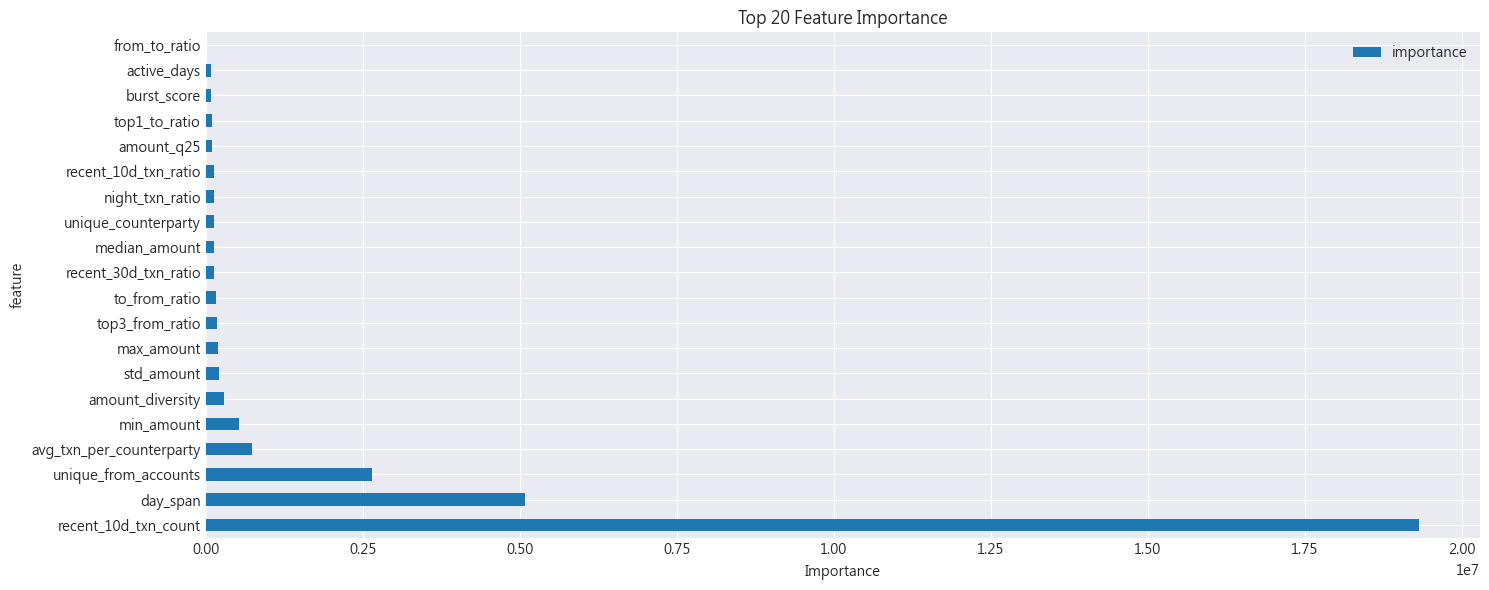

In [18]:
# %% 7. 特徵重要性分析（快速訓練）
print("\n" + "=" * 80)
print("第六步：特徵重要性分析")
print("=" * 80)

# 快速訓練一個模型查看特徵重要性
X_train_sub, X_val_sub, y_train_sub, y_val_sub = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

lgb_params = {
    'objective': 'binary',
    'metric': 'auc',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': -1,
    'scale_pos_weight': (y_train_sub == 0).sum() / (y_train_sub == 1).sum()
}

lgb_train = lgb.Dataset(X_train_sub, y_train_sub)
lgb_val = lgb.Dataset(X_val_sub, y_val_sub, reference=lgb_train)

print("訓練快速模型分析特徵重要性...")
quick_model = lgb.train(
    lgb_params,
    lgb_train,
    num_boost_round=200,
    valid_sets=[lgb_val],
    callbacks=[lgb.early_stopping(stopping_rounds=20), lgb.log_evaluation(period=0)]
)

# 特徵重要性
feature_importance = pd.DataFrame({
    'feature': feature_cols,
    'importance': quick_model.feature_importance(importance_type='gain')
}).sort_values('importance', ascending=False)

print("\nTop 20 重要特徵:")
print(feature_importance.head(20))

# 視覺化
plt.figure(figsize=(10, 8))
feature_importance.head(20).plot(x='feature', y='importance', kind='barh')
plt.title('Top 20 Feature Importance')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

In [19]:
# %% 8. 交叉驗證訓練
print("\n" + "=" * 80)
print("第七步：交叉驗證訓練")
print("=" * 80)

n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

cv_scores = []
oof_predictions = np.zeros(len(X))
test_predictions = np.zeros(len(X_test))

for fold, (train_idx, val_idx) in enumerate(skf.split(X, y), 1):
    print(f"\n{'='*60}")
    print(f"Fold {fold}/{n_splits}")
    print(f"{'='*60}")

    X_train_fold, X_val_fold = X.iloc[train_idx], X.iloc[val_idx]
    y_train_fold, y_val_fold = y.iloc[train_idx], y.iloc[val_idx]

    # LightGBM
    lgb_train_fold = lgb.Dataset(X_train_fold, y_train_fold)
    lgb_val_fold = lgb.Dataset(X_val_fold, y_val_fold, reference=lgb_train_fold)

    lgb_model = lgb.train(
        lgb_params,
        lgb_train_fold,
        num_boost_round=1000,
        valid_sets=[lgb_val_fold],
        callbacks=[lgb.early_stopping(stopping_rounds=50), lgb.log_evaluation(period=100)]
    )

    # 預測
    val_pred = lgb_model.predict(X_val_fold, num_iteration=lgb_model.best_iteration)
    oof_predictions[val_idx] = val_pred

    # 測試集預測
    test_pred = lgb_model.predict(X_test, num_iteration=lgb_model.best_iteration)
    test_predictions += test_pred / n_splits

    # 評估
    val_auc = roc_auc_score(y_val_fold, val_pred)
    cv_scores.append(val_auc)

    print(f"Fold {fold} AUC: {val_auc:.4f}")

print(f"\n{'='*60}")
print(f"交叉驗證平均 AUC: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")
print(f"{'='*60}")

# OOF AUC
oof_auc = roc_auc_score(y, oof_predictions)
print(f"OOF AUC: {oof_auc:.4f}")


第七步：交叉驗證訓練

Fold 1/5
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.942168
Fold 1 AUC: 0.9422

Fold 2/5
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.918805
Fold 2 AUC: 0.9188

Fold 3/5
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.965721
Fold 3 AUC: 0.9657

Fold 4/5
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.940547
Fold 4 AUC: 0.9405

Fold 5/5
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.905476
Fold 5 AUC: 0.9055

交叉驗證平均 AUC: 0.9345 ± 0.0208
OOF AUC: 0.9360



第八步：閾值優化
最佳閾值: 0.800
最佳 F1 Score: 0.0799


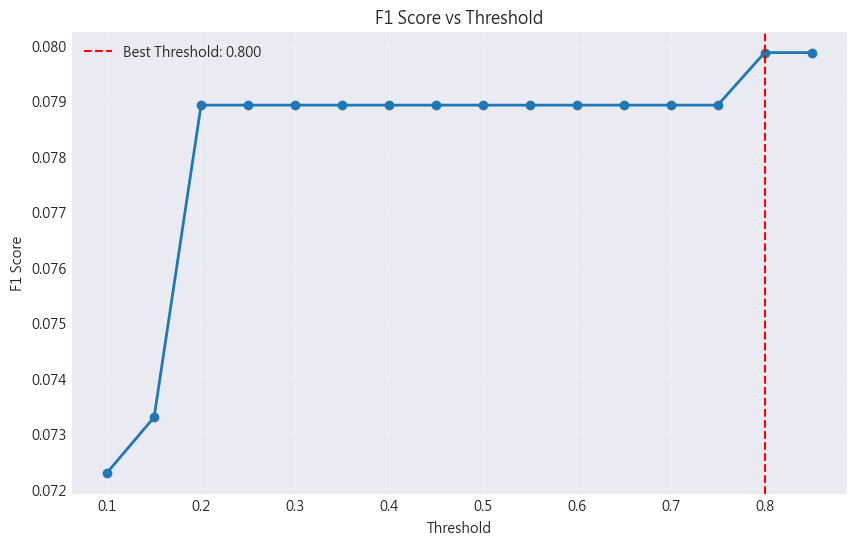


分類報告（最佳閾值）:
              precision    recall  f1-score   support

      Normal       1.00      0.94      0.97    332764
       Alert       0.04      0.90      0.08      1004

    accuracy                           0.94    333768
   macro avg       0.52      0.92      0.52    333768
weighted avg       1.00      0.94      0.97    333768



In [20]:
# %% 9. 閾值優化
print("\n" + "=" * 80)
print("第八步：閾值優化")
print("=" * 80)

from sklearn.metrics import precision_recall_curve

# 計算不同閾值下的F1分數
thresholds_to_test = np.arange(0.1, 0.9, 0.05)
f1_scores = []

for threshold in thresholds_to_test:
    y_pred = (oof_predictions > threshold).astype(int)
    f1 = f1_score(y, y_pred)
    f1_scores.append(f1)

best_threshold_idx = np.argmax(f1_scores)
best_threshold = thresholds_to_test[best_threshold_idx]
best_f1 = f1_scores[best_threshold_idx]

print(f"最佳閾值: {best_threshold:.3f}")
print(f"最佳 F1 Score: {best_f1:.4f}")

# 視覺化
plt.figure(figsize=(10, 6))
plt.plot(thresholds_to_test, f1_scores, marker='o', linewidth=2)
plt.axvline(best_threshold, color='red', linestyle='--', label=f'Best Threshold: {best_threshold:.3f}')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Threshold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 最佳閾值下的分類報告
y_pred_best = (oof_predictions > best_threshold).astype(int)
print("\n分類報告（最佳閾值）:")
print(classification_report(y, y_pred_best, target_names=['Normal', 'Alert']))

In [21]:
# %% 10. 生成提交文件
print("\n" + "=" * 80)
print("第九步：生成提交文件")
print("=" * 80)

# 使用最佳閾值
test_pred_labels = (test_predictions > best_threshold).astype(int)

submission = pd.DataFrame({
    'acct': test_data['acct'],
    'label': test_pred_labels
})

# 保存
output_path = f'{DATA_PATH}\\result.csv'
submission.to_csv(output_path, index=False)

print(f"✅ 提交文件已保存: {output_path}")
print(f"\n預測結果分布:")
print(submission['label'].value_counts())
print(f"預測警示帳戶比例: {submission['label'].mean()*100:.2f}%")


第九步：生成提交文件
✅ 提交文件已保存: G:\中正大學\比賽\E-Sun\E-SUN初賽資料\submission_improved.csv

預測結果分布:
label
0    4338
1     442
Name: count, dtype: int64
預測警示帳戶比例: 9.25%


In [23]:
# %% 11. 最終總結
print("\n" + "=" * 80)
print("🎉 訓練完成！模型性能總結")
print("=" * 80)

print(f"""
📊 模型表現:
  - 交叉驗證 AUC: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}
  - OOF AUC: {oof_auc:.4f}
  - 最佳閾值: {best_threshold:.3f}
  - 最佳 F1 Score: {best_f1:.4f}
""")


🎉 訓練完成！模型性能總結

📊 模型表現:
  - 交叉驗證 AUC: 0.9345 ± 0.0208
  - OOF AUC: 0.9360
  - 最佳閾值: 0.800
  - 最佳 F1 Score: 0.0799

